In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## reading data

In [2]:
df = pd.read_csv('ratings.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
max(df.userId.values), max(df.movieId.values)

(610, 193609)

## data preprocessing

In [5]:
X = np.zeros((max(df.userId.values), max(df.movieId.values)))

In [6]:
for row in df.iterrows():
    X[int(row[1].userId - 1)][int(row[1].movieId - 1)] = row[1].rating

In [9]:
X

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

## matrix factorization

In [41]:
from sklearn.decomposition import NMF

In [42]:
model = NMF(n_components=5)

In [43]:
model.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [44]:
model.transform(X)

array([[2.02110404, 0.        , 0.29468966, 0.19922184, 0.        ],
       [0.        , 0.10046617, 0.        , 0.33241094, 0.        ],
       [0.07831054, 0.        , 0.        , 0.        , 0.        ],
       ...,
       [2.06453609, 1.59094627, 0.78999022, 1.12797222, 0.12058168],
       [0.        , 0.        , 0.80739145, 0.04322112, 0.        ],
       [0.42474037, 5.05590884, 0.        , 1.54716227, 0.20407749]])

## implementaton

In [16]:
class MF:
    def __init__(self, n_factors, alpha=0.01, steps=10):
        self.n_factors = n_factors
        self.alpha = alpha
        self.steps = steps
        
    def train(self, data):
        w = np.random.normal(0, 0.1, (data.shape[0], self.n_factors))
        h = np.random.normal(0, 0.1, (data.shape[1], self.n_factors))

        for s in range(self.steps):
            for u in range(data.shape[0]):
                for i in range(data.shape[1]):
                    if data[u][i] == 0:
                        continue
                    err = data[u][i] - np.dot(w[u], h[i])
                    w[u] += self.alpha * err * h[i]
                    h[i] += self.alpha * err * w[u]
        self.w = w
        self.h = h
    
    def predict(self, u, i):
        return np.dot(self.w[u], self.h[i])

In [48]:
model = MF(5, steps=500, alpha=0.01)

In [49]:
lX = X[:100, :100]

In [50]:
lX

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 3.5, ..., 0. , 0. , 0. ]])

In [51]:
model.train(lX)

In [52]:
pX = np.zeros_like(lX)

In [53]:
for u in range(pX.shape[0]):
    for i in range(pX.shape[1]):
        pX[u][i] = model.predict(u, i)
        if pX[u][i] < 0: pX[u][i] = 0

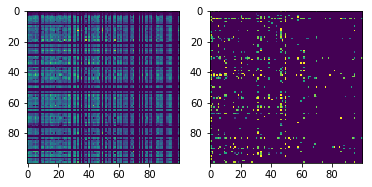

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(pX)
ax[1].imshow(lX)
plt.figure(figsize=(16, 9))
plt.show()